In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random

In [128]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [129]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Visualizando os dados

In [130]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


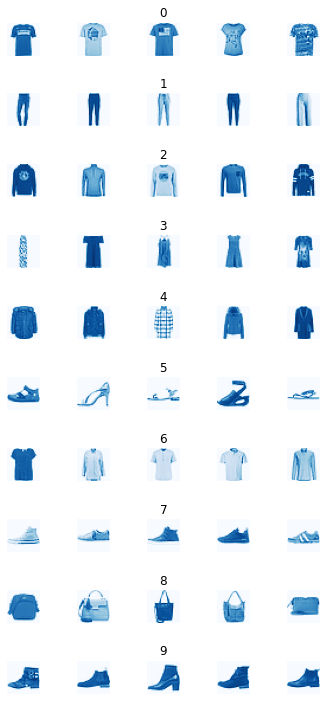

In [132]:
num_of_samples = []
cols = 5; 
num_classes = 10; 

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5,10))
fig.tight_layout()

for j in range(num_classes):
  x_selected = X_train[y_train == j]
  
  for i in range(cols):
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("Blues"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]


Text(0, 0.5, 'Número de imagens')

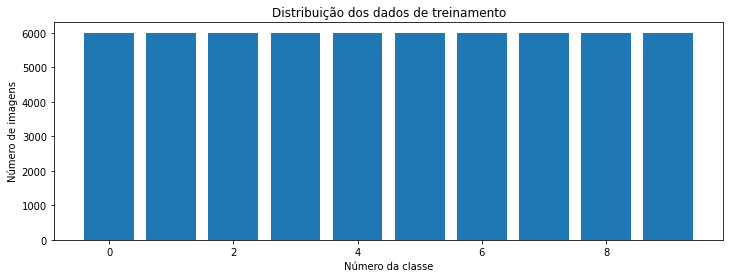

In [133]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribuição dos dados de treinamento")
plt.xlabel("Número da classe")
plt.ylabel("Número de imagens")

# Preparação dos dados para o treinamento

In [134]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [135]:
X_train = X_train/255.0
X_test = X_test/255.0

In [136]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 784)
(60000, 784)
(60000, 10)
(10000, 10)


# Treinamento


In [137]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(600, input_dim=num_pixels, activation='relu'))
model.add(tf.keras.layers.Dense(350, activation='relu'))
#model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_91 (Dense)             (None, 350)               210350    
_________________________________________________________________
dense_92 (Dense)             (None, 10)                3510      
Total params: 684,860
Trainable params: 684,860
Non-trainable params: 0
_________________________________________________________________
None


In [138]:
history =  model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/20
270/270 [==============================] - 5s 19ms/step - loss: 1.2761 - accuracy: 0.6990 - val_loss: 0.4721 - val_accuracy: 0.8285
Epoch 2/20
270/270 [==============================] - 5s 18ms/step - loss: 0.4052 - accuracy: 0.8542 - val_loss: 0.4059 - val_accuracy: 0.8513
Epoch 3/20
270/270 [==============================] - 5s 18ms/step - loss: 0.3670 - accuracy: 0.8653 - val_loss: 0.3892 - val_accuracy: 0.8610
Epoch 4/20
270/270 [==============================] - 5s 18ms/step - loss: 0.3378 - accuracy: 0.8746 - val_loss: 0.4129 - val_accuracy: 0.8488
Epoch 5/20
270/270 [==============================] - 5s 18ms/step - loss: 0.3234 - accuracy: 0.8786 - val_loss: 0.3681 - val_accuracy: 0.8718
Epoch 6/20
270/270 [==============================] - 5s 18ms/step - loss: 0.3177 - accuracy: 0.8812 - val_loss: 0.3596 - val_accuracy: 0.8728
Epoch 7/20
270/270 [==============================] - 5s 18ms/step - loss: 0.3086 - accuracy: 0.8845 - val_loss: 0.3660 - val_accuracy: 0.8728

# Avaliando o resultado do treinamento

Text(0.5, 0, 'Epoch')

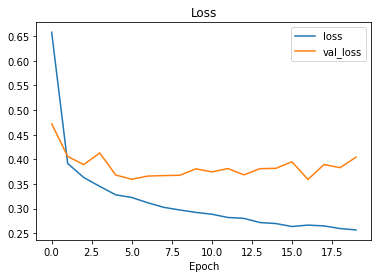

In [139]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

In [140]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:',score[0])
print('Test accuracy:',score[1])

<class 'list'>
Test score: 0.42882558703422546
Test accuracy: 0.8632000088691711
